<a href="https://colab.research.google.com/github/nthammadi-uncc/applied-machine-learning/blob/main/Logistic%20Regression/Logistic_Regression_Model_Iris_Dataset_Naomi_T.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><h2>Training Logistic Regression Model using Iris Data set</h2>

In [1]:
## Author: Naomi Nikita Thammadi
## Date: 9-20-2021
## Description: This notebook completes all these tasks:
## 1. Create a new Jupyter notebook for this assignment
## 2. Load the Iris dataset from the scikit-learn sample datasets
## 3. Plot the dataset 
## 4. Create an appropriate training and testing dataset using a sample of the Iris dataset
## 5. EXPLAIN in detail the methodology used for selecting the samples for each of the above datasets
## 6. Use scikit-learn to train a one-versus-rest logistic regression classifier model on the Iris features
## 7. Run the model using the testing dataset
## 8. Use matplotlib to plot the results in a scatterplot; color the plotted items with the actual labeled membership 
##    (e.g., green = 0, blue = 1, etc.) vs the predicted membership shown on the y-axis
## 9. Format the code to PEP-8 guidelines (https://www.python.org/dev/peps/pep-0008/)
## 10. Follow object-oriented programming methods (appropriate class/methods, etc.) where applicable
## 11. Comments in code!
## 12. Add heading and markdown cells throughout the notebook explaining how your program works, 
##     a description of the files and libraries necessary to run your program, 
##     the reasoning for your design / parameter choices, results, etc. 


<h5>The below code is used to import the necessary packages</h5>

In [2]:
# importing packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import os
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [3]:
#set random seed
seed=np.random.seed(42)

<h5>The below code is used to save an image as a result of a plot</h5>

In [4]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

#define save_fig function to save the figure
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

<h5>Task 2: Load the Iris dataset from scikit-learn sample datasets</h5>

In [5]:
#load the iris dataset into iris
iris = datasets.load_iris()
X = iris.data[:, 0:2]  # we only take the first two features for visualization --> sepal length and sepal width 
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

In [6]:
#show the number of rows and columns in the data, the feature names and target names
iris.data.shape, iris.feature_names, iris.target_names

((150, 4),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

<h5>Task 3: Plot the dataset</h5>

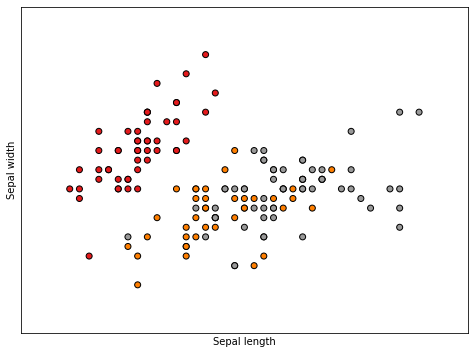

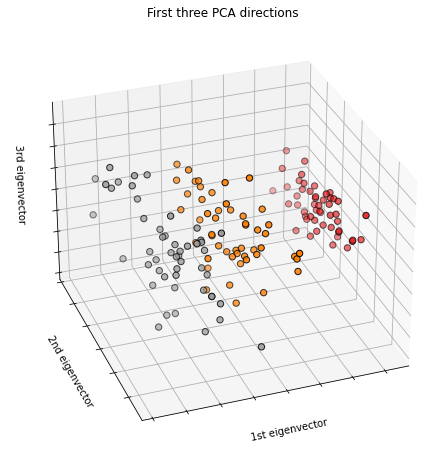

In [7]:
#create a plot space 
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

#if we show the plot now, it will be shown in a 2-D scatter plot
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

<h4>The above 2-D graph shows the orange and grey dots as overlaps. But the 3-D graph shows that there is a separation between them with some overlap </h4>

In [8]:
# check the description of iris dataset 
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

<h5>Confirm the details provided by converting the iris dataset into pandas data frame and then describing the dataframe</h5>

In [9]:
#convert iris into pandas dataframe to confirm mean and std
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [10]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<h4>Check the fit of the dataset for individual features and then for both features. This is also to answer Task 5</h4>

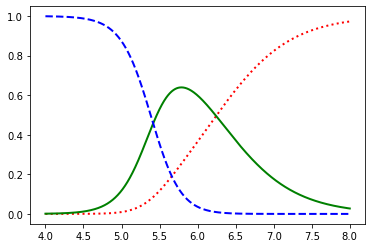

In [11]:
#checking the fit of the dataset for individual features --> sepal length
log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(iris.data[:, 0:1], y)

X_new = np.linspace(4, 8, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 2], "r:", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris Versicolour")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Iris Setosa")

plt.show()

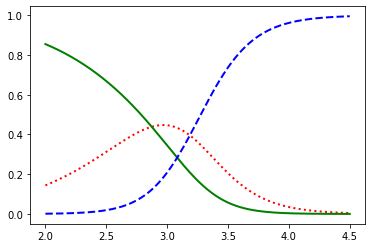

In [12]:
#checking the fit of the dataset for individual features --> sepal width
log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(iris.data[:, 1:2], y)

X_new = np.linspace(2, 4.5, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 2], "r:", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris Versicolour")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Iris Setosa")

plt.show()

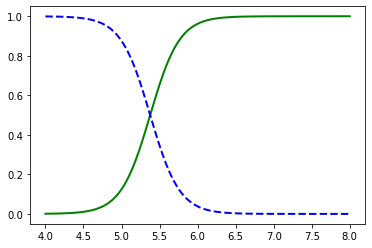

In [13]:
#re-checking the fit of the dataset for individual features --> sepal length
#for Iris Setosa and Not Iris Setosa
log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(iris.data[:, 0:1], (iris["target"] == 0).astype(np.int)) # 1 if Iris Setosa, else 0

X_new = np.linspace(4, 8, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 0], "g-", linewidth=2, label="Not Iris Setosa")
plt.plot(X_new, y_proba[:, 1], "b--", linewidth=2, label="Iris Setosa")

plt.show()


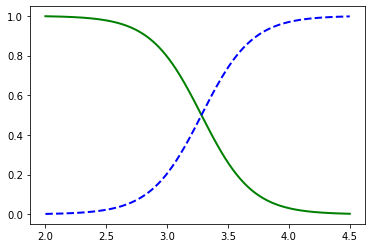

In [14]:
#re-checking the fit of the dataset for individual features --> sepal width
#for Iris Setosa and Not Iris Setosa
log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(iris.data[:, 1:2], (iris["target"] == 0).astype(np.int)) # 1 if Iris Setosa, else 0

X_new = np.linspace(2, 4.5, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 0], "g-", linewidth=2, label="Not Iris Setosa")
plt.plot(X_new, y_proba[:, 1], "b--", linewidth=2, label="Iris Setosa")

plt.show()


[5.37737738]
Saving figure Boundary line plot for Sepal length


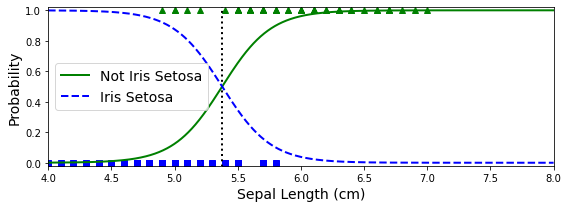

In [15]:
#Plotting the boundary line for Sepal Length
log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(iris.data[:, 0:1], (iris["target"] == 0).astype(np.int)) # 1 if Iris Setosa, else 0


X_new = np.linspace(4, 8, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

decision_boundary = X_new[y_proba[:, 0] >= 0.5][0]
print(decision_boundary)
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 0], "g-", linewidth=2, label="Not Iris Setosa")
plt.plot(X_new, y_proba[:, 1], "b--", linewidth=2, label="Iris Setosa")
plt.xlabel("Sepal Length (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([4, 8, -0.02, 1.02])
save_fig("Boundary line plot for Sepal length")
plt.show()


<h5>Note that the boundary line is very close to estimate of the mean of Sepal length(5.843333) </h5>

[3.28378378]
Saving figure Boundary line plot for Sepal width


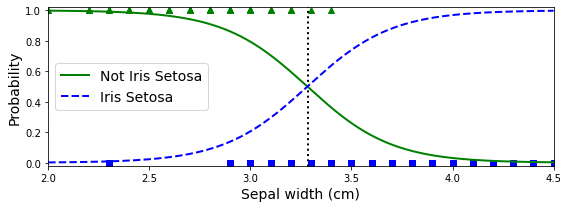

In [16]:
#Plotting the boundary line for Sepal width
log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(iris.data[:, 1:2], (iris["target"] == 0).astype(np.int)) # 1 if Iris Setosa, else 0

X_new = np.linspace(2, 4.5, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
print(decision_boundary)
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 0], "g-", linewidth=2, label="Not Iris Setosa")
plt.plot(X_new, y_proba[:, 1], "b--", linewidth=2, label="Iris Setosa")
plt.xlabel("Sepal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([2, 4.5, -0.02, 1.02])
save_fig("Boundary line plot for Sepal width")
plt.show()


<h5>Note that the boundary line is very close to estimate of the mean of Sepal width(3.057333) </h5>

Saving figure logistic_regression_contour_plot


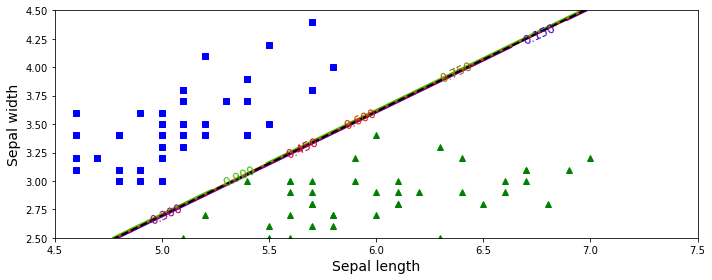

In [17]:
#check the fit of the dataset for both features --> sepal length & sepal width
log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(iris.data[:, 0:2], iris["target"] == 0)

x0, x1 = np.meshgrid(
        np.linspace(4.5, 7.5, 500).reshape(-1, 1),
        np.linspace(2.5, 4.5, 500).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([4.5, 7.5])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=2)
plt.xlabel("Sepal length", fontsize=14)
plt.ylabel("Sepal width", fontsize=14)
plt.axis([4.5, 7.5, 2.5, 4.5])
save_fig("logistic_regression_contour_plot")
plt.show()

<h5>The above plot shows a clear demarkation between Iris Setosa(indicated with blue squares) and Not Iris Setosa which can be Iris Versicolour or Iris Virginica(indicated by green triangles). <br/>This also matches with the 3-D plot we created initially</h5>

<h4>Task 4: Create Training and Testing datasets</h4>

In [18]:
#divide into train and test sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h5>Task 5: Explain your methodology for selecting samples of the above datasets</h5>
<h5>The training and testing datasets are split into 70% and 30% respectively. This split gave the mean and std of the training and testing datasets values that were close to the mean and std of the iris dataset on the whole and also to the boundary line values mentioned in the graphs above.<br/>
Other percentages used for training and testing datasets were :  75:25, 67:33 and 80:20</h5>

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 2)
(45, 2)
(105,)
(45,)


In [20]:
#convert X train and test datasets into pandas dataframe to check mean and std
df_X_train = pd.DataFrame(data= X_train,
                     columns= iris['feature_names'][0:2] )
df_X_train.describe()
#df_X_train[df_X_train["sepal length (cm)"]<=5.84 ].describe()

,sepal length (cm),sepal width (cm)
count,105.000000,105.000000
mean,5.842857,3.009524
std,0.833304,0.418910
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.700000,4.200000


In [21]:
y_train[y_train==0].size

31

In [22]:
y_train[y_train!=0].size

74

<h5>The above details show that the mean is almost same and the training set has roughly 1:2 ratio of Iris Setosa and not Iris Setosa</h5>

In [23]:
df_X_test = pd.DataFrame(data= X_test,
                     columns= iris['feature_names'][0:2] )
df_X_test.describe()
#df_X_test[df_X_test["sepal length (cm)"]<=5.84 ].describe()

,sepal length (cm),sepal width (cm)
count,45.000000,45.000000
mean,5.844444,3.168889
std,0.825050,0.458665
min,4.400000,2.200000
25%,5.200000,2.800000
50%,5.800000,3.100000
75%,6.400000,3.400000
max,7.900000,4.400000


In [24]:
y_test[y_test==0].size

19

In [25]:
y_test[y_test!=0].size

26

<h5>The above details show that the mean is almost same and the test set has roughly 1:2 ratio of Iris Setosa and not Iris Setosa</h5>

<h5>Task 6: Use scikit-learn to train a one-versus-rest logistic regression classifier model on the Iris features</h5>

In [26]:
# setting C value to a smaller number to reduce the risk of overfitting
C = 1.0

In [27]:
# Create one-vs-rest classifier
log_reg=LogisticRegression(C=C, penalty='l2',
                                            solver='saga',
                                            multi_class='ovr',
                                            max_iter=10000)

Accuracy (train) for One-vs-Rest Logistic Regression: 80.0% 


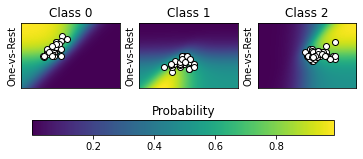

In [28]:
#Running the model for training dataset
%matplotlib inline
plt.figure(figsize=(3 * 2, 4))
plt.subplots_adjust(bottom=.2, top=.95)

xx = np.linspace(3, 9, 100)
yy = np.linspace(1, 5, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy (train) for One-vs-Rest Logistic Regression: %0.1f%% " % (accuracy * 100))

# View probabilities:
probas = log_reg.predict_proba(Xfull)
n_classes = np.unique(y_pred).size
for k in range(n_classes):
    plt.subplot(1, n_classes, k + 1)
    plt.title("Class %d" % k)
    plt.ylabel("One-vs-Rest")
    imshow_handle = plt.imshow(probas[:, k].reshape((100, 100)),
                               extent=(3 , 9, 1, 5), origin='lower')
    plt.xticks(())
    plt.yticks(())
    idx = (y_pred == k)
    if idx.any():
        plt.scatter(X_train[idx, 0], X_train[idx, 1], marker='o', c='w', edgecolor='k')

ax = plt.axes([0.15, 0.3, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

plt.show()

<h5>Task 7: Run the model using testing dataset</h5>

Accuracy (test) for One-vs-Rest Logistic Regression: 82.2% 


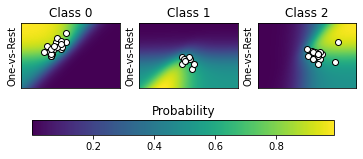

In [29]:
#Running the model for testing dataset
%matplotlib inline
plt.figure(figsize=(3 * 2, 4))
plt.subplots_adjust(bottom=.2, top=.95)

#xx = np.linspace(3, 9, 100)
#yy = np.linspace(1, 5, 100).T
#xx, yy = np.meshgrid(xx, yy)
#Xfull = np.c_[xx.ravel(), yy.ravel()]
#log_reg.fit(X_test, y_test)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (test) for One-vs-Rest Logistic Regression: %0.1f%% " % (accuracy * 100))

# View probabilities:
probas = log_reg.predict_proba(Xfull)
n_classes = np.unique(y_pred).size
for k in range(n_classes):
    plt.subplot(1, n_classes, k + 1)
    plt.title("Class %d" % k)
    plt.ylabel("One-vs-Rest")
    imshow_handle = plt.imshow(probas[:, k].reshape((100, 100)),
                               extent=(3 , 9, 1, 5), origin='lower')
    plt.xticks(())
    plt.yticks(())
    idx = (y_pred == k)
    if idx.any():
        plt.scatter(X_test[idx, 0], X_test[idx, 1], marker='o', c='w', edgecolor='k')

ax = plt.axes([0.15, 0.3, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

plt.show()

<h5>We see the accuracy of training dataset is slightly lower than testing dataset</h5>

<h5>Task 8: Plot the results in a scatterplot with same color scheme<br/>
    color the plotted items with the actual labeled membership (e.g., green = 0, blue = 1, etc.) vs the predicted membership shown on the y-axis</h5>

In [30]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

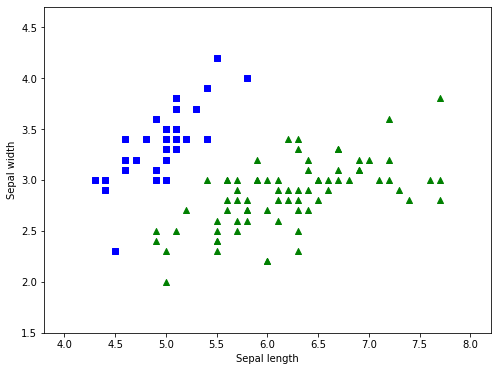

In [31]:
#using matplotlib to plot results in a scatterplot for training set
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='blue',marker='s')
plt.scatter(X_train[y_train!=0, 0], X_train[y_train!=0, 1], c='green', marker='^')
plt.plot(4.3,7.9, "k--", linewidth=2)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks()
plt.yticks()

plt.show()


<h5>The blue squares show Iris Setosa and the green triangles show a combination of Iris Virginica and Iris Vericolour in the training dataset</h5>

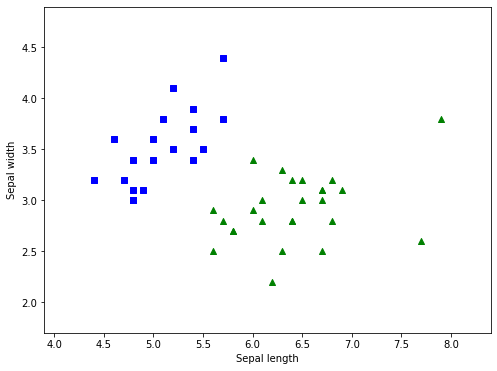

In [32]:
#using matplotlib to plot results in a scatterplot for testing set
x_min, x_max = X_test[:, 0].min() - .5, X_test[:, 0].max() + .5
y_min, y_max = X_test[:, 1].min() - .5, X_test[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], c='blue',marker='s')
plt.scatter(X_test[y_test!=0, 0], X_test[y_test!=0, 1], c='green', marker='^')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks()
plt.yticks()

plt.show()


<h5>The blue squares show Iris Setosa and the green triangles show a combination of Iris Virginica and Iris Vericolour in the testing dataset</h5>

<h3>We see a demarkation in the testing and training datasets too between the Iris species of the Iris datasets. This shows that our classification algorithm has identified the species correctly. The training dataset also shows a few outliers close to demarkation</h3>